In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests, urllib3
import json
import getpass
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


In [3]:
website_url = requests.get("http://archive.boston.com/news/local/articles/2007/04/15/sixfigurezipcodes_city/").text
soup = BeautifulSoup(website_url,'lxml')

In [4]:
d1 = [x.extract() for x in soup.find_all('td', class_='mcas')]

In [5]:
type(d1[0])

bs4.element.Tag

In [6]:
x=d1[0]

In [7]:
x.contents

['02101']

In [8]:
d1

[<td align="left" class="mcas">02101</td>,
 <td align="left" class="mcas">Downtown Boston</td>,
 <td align="center" class="mcas">34</td>,
 <td align="center" class="mcas"></td>,
 <td align="center" class="mcas"></td>,
 <td align="left" class="mcas">02108</td>,
 <td align="left" class="mcas">Beacon Hill</td>,
 <td align="center" class="mcas">2,440</td>,
 <td align="center" class="mcas">963</td>,
 <td align="center" class="mcas">39%</td>,
 <td align="left" class="mcas">02109</td>,
 <td align="left" class="mcas">Markets / Inner Harbor</td>,
 <td align="center" class="mcas">3,230</td>,
 <td align="center" class="mcas">1,175</td>,
 <td align="center" class="mcas">36%</td>,
 <td align="left" class="mcas">02110</td>,
 <td align="left" class="mcas">Financial District / Wharves</td>,
 <td align="center" class="mcas">2,608</td>,
 <td align="center" class="mcas">1,229</td>,
 <td align="center" class="mcas">47%</td>,
 <td align="left" class="mcas">02111</td>,
 <td align="left" class="mcas">Chinato

In [12]:
d2 = [x.contents for x in d1]
d2

[['02101'],
 ['Downtown Boston'],
 ['34'],
 [],
 [],
 ['02108'],
 ['Beacon Hill'],
 ['2,440'],
 ['963'],
 ['39%'],
 ['02109'],
 ['Markets / Inner Harbor'],
 ['3,230'],
 ['1,175'],
 ['36%'],
 ['02110'],
 ['Financial District / Wharves'],
 ['2,608'],
 ['1,229'],
 ['47%'],
 ['02111'],
 ['Chinatown / Tufts-New England Medical Center'],
 ['2,405'],
 ['480'],
 ['20%'],
 ['02112'],
 ['Downtown Boston'],
 ['347'],
 ['10'],
 ['3%'],
 ['02113'],
 ['North End'],
 ['4,113'],
 ['346'],
 ['8%'],
 ['02114'],
 ['West End / Back of the Hill'],
 ['6,431'],
 ['1,346'],
 ['21%'],
 ['02115'],
 ['Fenway / East Fens / Longwood'],
 ['8,119'],
 ['993'],
 ['12%'],
 ['02116'],
 ['Back Bay'],
 ['10,272'],
 ['3,032'],
 ['30%'],
 ['02117'],
 ['Downtown Boston'],
 ['295'],
 ['25'],
 ['8%'],
 ['02118'],
 ['South End'],
 ['11,045'],
 ['1,956'],
 ['18%'],
 ['02119'],
 ['Roxbury'],
 ['10,400'],
 ['197'],
 ['2%'],
 ['02120'],
 ['Roxbury Crossing'],
 ['5,196'],
 ['121'],
 ['2%'],
 ['02121'],
 ['Roxbury / Grove Hall'],
 ['

In [14]:
d3 = [x[0] if len(x) > 0 else "None" for x in d2]
d3

['02101',
 'Downtown Boston',
 '34',
 'None',
 'None',
 '02108',
 'Beacon Hill',
 '2,440',
 '963',
 '39%',
 '02109',
 'Markets / Inner Harbor',
 '3,230',
 '1,175',
 '36%',
 '02110',
 'Financial District / Wharves',
 '2,608',
 '1,229',
 '47%',
 '02111',
 'Chinatown / Tufts-New England Medical Center',
 '2,405',
 '480',
 '20%',
 '02112',
 'Downtown Boston',
 '347',
 '10',
 '3%',
 '02113',
 'North End',
 '4,113',
 '346',
 '8%',
 '02114',
 'West End / Back of the Hill',
 '6,431',
 '1,346',
 '21%',
 '02115',
 'Fenway / East Fens / Longwood',
 '8,119',
 '993',
 '12%',
 '02116',
 'Back Bay',
 '10,272',
 '3,032',
 '30%',
 '02117',
 'Downtown Boston',
 '295',
 '25',
 '8%',
 '02118',
 'South End',
 '11,045',
 '1,956',
 '18%',
 '02119',
 'Roxbury',
 '10,400',
 '197',
 '2%',
 '02120',
 'Roxbury Crossing',
 '5,196',
 '121',
 '2%',
 '02121',
 'Roxbury / Grove Hall',
 '9,575',
 '123',
 '1%',
 '02122',
 'Dorchester / Fields Corner',
 '9,813',
 '394',
 '4%',
 '02123',
 'Downtown Boston',
 '255',
 'None

In [15]:
len(d3)

260

In [16]:
x1 = [d3[i] for i in range(len(d3)) if ((i % 5) == 0)  ]
x2 = [d3[i] for i in range(len(d3)) if ((i % 5) == 1)  ]
x3 = [d3[i] for i in range(len(d3)) if ((i % 5) == 2)  ]
x4 = [d3[i] for i in range(len(d3)) if ((i % 5) == 3)  ]
x5 = [d3[i] for i in range(len(d3)) if ((i % 5) == 4)  ]

In [17]:
import pandas as pd
df1=pd.DataFrame([x1, x2]).T
df1

,0,1
0,02101,Downtown Boston
1,02108,Beacon Hill
2,02109,Markets / Inner Harbor
3,02110,Financial District / Wharves
4,02111,Chinatown / Tufts-New England Medical Center
5,02112,Downtown Boston
6,02113,North End
7,02114,West End / Back of the Hill
8,02115,Fenway / East Fens / Longwood
9,02116,Back Bay


In [18]:
df1.columns = ['Zip Code', 'Community']
df1

,Zip Code,Community
0,02101,Downtown Boston
1,02108,Beacon Hill
2,02109,Markets / Inner Harbor
3,02110,Financial District / Wharves
4,02111,Chinatown / Tufts-New England Medical Center
5,02112,Downtown Boston
6,02113,North End
7,02114,West End / Back of the Hill
8,02115,Fenway / East Fens / Longwood
9,02116,Back Bay


In [19]:
#df1.shape
df1.dtypes

Zip Code     object
Community    object
dtype: object

In [20]:
df1["Zip Code"] = pd.to_numeric(df1["Zip Code"],errors='coerce')

In [21]:
df2 = pd.read_csv ("US Zip Codes from 2013 Government Data.csv")
df2.head()
#df2.dtypes

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [22]:
df2.rename(columns = { 'ZIP': 'Zip Code'}, inplace=True)
df3 = pd.merge(df1, df2, on='Zip Code')
df3

,Zip Code,Community,LAT,LNG
0,2108,Beacon Hill,42.357768,-71.064858
1,2109,Markets / Inner Harbor,42.367032,-71.050493
2,2110,Financial District / Wharves,42.361962,-71.047846
3,2111,Chinatown / Tufts-New England Medical Center,42.350518,-71.059077
4,2113,North End,42.365331,-71.055233
5,2114,West End / Back of the Hill,42.363174,-71.068646
6,2115,Fenway / East Fens / Longwood,42.337105,-71.105696
7,2116,Back Bay,42.350579,-71.076397
8,2118,South End,42.337582,-71.070482
9,2119,Roxbury,42.324029,-71.085017


In [23]:
print('The dataframe has {} communities.'.format(
        len(df3['Community'].unique()),
        df3.shape[0]
    )
)

The dataframe has 32 communities.


In [24]:
address = 'Boston, MA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Boston are 42.3602534, -71.0582912.


#### Create a map of Boston with communities superimposed on top.

#### Define Foursquare Credentials and Version

In [25]:
# create map of Boston using latitude and longitude values
map_Boston = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for LAT, LNG, Community in zip(df3['LAT'], df3['LNG'], df3['Community']):
    label = '{}'.format(Community)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [LAT, LNG],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boston)
    
map_Boston

In [26]:
CLIENT_ID = 'IO0HED3B1BBWRIFVXEPU3VSJOKCUWJYEKB5C2NKLDJ44Y3XV' # your Foursquare ID
CLIENT_SECRET = 'WNINVVERINF05ID3TJGJD2NLCN2AWGKV1THFBQDA3YF3GQP5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#### Let's explore the first Community in our dataframe.

Get the communities's name.

In [27]:
df3.loc[0, 'Community']

'Beacon Hill'

Get the communities's latitude and longitude values.

In [28]:
neighborhood_latitude = df3.loc[0, 'LAT'] # community latitude value
neighborhood_longitude = df3.loc[0, 'LNG'] # community longitude value

neighborhood_name = df3.loc[0, 'Community'] # community name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Beacon Hill are 42.357768, -71.064858.


#### Now, let's get the top 100 venues that are in Beacon Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [29]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IO0HED3B1BBWRIFVXEPU3VSJOKCUWJYEKB5C2NKLDJ44Y3XV&client_secret=WNINVVERINF05ID3TJGJD2NLCN2AWGKV1THFBQDA3YF3GQP5&v=20180605&ll=42.357768,-71.064858&radius=500&limit=100'

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d1e2350ad1789002c3c9839'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Beacon Hill',
  'headerFullLocation': 'Beacon Hill, Boston',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 102,
  'suggestedBounds': {'ne': {'lat': 42.3622680045, 'lng': -71.05877965999237},
   'sw': {'lat': 42.3532679955, 'lng': -71.07093634000763}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a549cd9f964a5202ab31fe3',
       'name': 'Frog Pond',
       'location': {'address': '84 Beacon St',
        'crossStreet': 'at Boston Common',
        'lat': 42.35613375967781,
        'lng': -71.06567233800888,
    

Let's borrow the **get_category_type** function from the Foursquare lab.

In [31]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [32]:
venues = results['response']['groups'][0]['items']
#venue = results['response']['venue']    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Frog Pond,Lake,42.356134,-71.065672
1,Boston Common,Park,42.355487,-71.064882
2,Boston Athenaeum,Library,42.357481,-71.061838
3,No. 9 Park,French Restaurant,42.357540,-71.063193
4,Florina,Pizza Place,42.359375,-71.063219


## 2. Explore Communities in Boston

#### Let's create a function to repeat the same process to all the Communities in Boston

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a new dataframe called *Boston_venues*.

In [34]:
Boston_venues = getNearbyVenues(names=df3['Community'],
                                   latitudes=df3['LAT'],
                                   longitudes=df3['LNG']
                                  )

Beacon Hill
Markets / Inner Harbor
Financial District / Wharves
Chinatown / Tufts-New England Medical Center
North End
West End / Back of the Hill
Fenway / East Fens / Longwood
Back Bay
South End
Roxbury
Roxbury Crossing
Roxbury / Grove Hall
Dorchester / Fields Corner
Dorchester / Codman Square
Dorchester / Uphams Corner
Mattapan
South Boston
East Boston
Charlestown
Jamaica Plain
Roslindale
West Roxbury
Allston
Brighton
Hyde Park
Cambridge
Cambridge
Cambridge
Cambridge
Cambridge
Somerville
Somerville
Somerville
North Brighton / Cambridge
Prudential
South Boston / Fort Point
Kenmore / Boston University
Brookline
Brookline


In [35]:
print(Boston_venues.shape)
Boston_venues

(1521, 7)


,Community,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beacon Hill,42.357768,-71.064858,Frog Pond,42.356134,-71.065672,Lake
1,Beacon Hill,42.357768,-71.064858,Boston Common,42.355487,-71.064882,Park
2,Beacon Hill,42.357768,-71.064858,Boston Athenaeum,42.357481,-71.061838,Library
3,Beacon Hill,42.357768,-71.064858,No. 9 Park,42.357540,-71.063193,French Restaurant
4,Beacon Hill,42.357768,-71.064858,Florina,42.359375,-71.063219,Pizza Place
5,Beacon Hill,42.357768,-71.064858,Zen Japanese Grill & Sushi Bar,42.358020,-71.062531,Sushi Restaurant
6,Beacon Hill,42.357768,-71.064858,Union Club of Boston,42.357411,-71.062702,Restaurant
7,Beacon Hill,42.357768,-71.064858,Grotto,42.359915,-71.062807,Italian Restaurant
8,Beacon Hill,42.357768,-71.064858,Museum of African American History,42.360058,-71.065287,History Museum
9,Beacon Hill,42.357768,-71.064858,Tadpole Playground,42.356127,-71.064724,Playground


In [36]:
Boston_venues.groupby('Community').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Community,,,,,,
Allston,11,11,11,11,11,11
Back Bay,100,100,100,100,100,100
Beacon Hill,100,100,100,100,100,100
Brighton,46,46,46,46,46,46
Brookline,84,84,84,84,84,84
Cambridge,168,168,168,168,168,168
Charlestown,21,21,21,21,21,21
Chinatown / Tufts-New England Medical Center,97,97,97,97,97,97
Dorchester / Codman Square,7,7,7,7,7,7


In [37]:
print('There are {} uniques categories.'.format(len(Boston_venues['Venue Category'].unique())))

There are 238 uniques categories.


## 3. Analyze Each Community

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [38]:
# one hot encoding
Boston_onehot = pd.get_dummies(Boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Boston_onehot['Community'] = Boston_venues['Community'] 

# move neighborhood column to the first column
fixed_columns = [Boston_onehot.columns[-1]] + list(Boston_onehot.columns[:-1])
Boston_onehot = Boston_onehot[fixed_columns]

Boston_onehot.head()

,Community,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Caribbean Restaurant,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Hockey Rink,College Stadium,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Ski Chalet,Smoke Shop,Soba Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Tour Provider,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waste Facility,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Beacon Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Beacon Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [39]:
Boston_onehot.shape

(1521, 239)

In [40]:
Boston_grouped = Boston_onehot.groupby('Community').mean().reset_index()
Boston_grouped

,Community,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Caribbean Restaurant,Cemetery,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Hockey Rink,College Stadium,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Ski Chalet,Smoke Shop,Soba Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Tour Provider,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waste Facility,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Allston,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [41]:
Boston_grouped.shape

(31, 239)

#### Let's print each Community along with the top 5 most common venues

In [42]:
num_top_venues = 5

for hood in Boston_grouped['Community']:
    print("----"+hood+"----")
    temp = Boston_grouped[Boston_grouped['Community'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston----
                 venue  freq
0  Rental Car Location  0.18
1          Pizza Place  0.09
2           Donut Shop  0.09
3         Dance Studio  0.09
4   Chinese Restaurant  0.09


----Back Bay----
                  venue  freq
0                   Spa  0.06
1   American Restaurant  0.06
2                   Gym  0.05
3  Gym / Fitness Center  0.03
4        Clothing Store  0.03


----Beacon Hill----
                 venue  freq
0  American Restaurant  0.05
1          Coffee Shop  0.05
2          Pizza Place  0.04
3                Plaza  0.04
4   Italian Restaurant  0.04


----Brighton----
                venue  freq
0  Chinese Restaurant  0.07
1         Pizza Place  0.07
2         Bus Station  0.07
3                 Pub  0.07
4                Bank  0.07


----Brookline----
              venue  freq
0       Pizza Place  0.06
1    Sandwich Place  0.04
2  Sushi Restaurant  0.04
3         Gift Shop  0.04
4       Coffee Shop  0.02


----Cambridge----
                 venue  freq
0  

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Community'] = Boston_grouped['Community']

for ind in np.arange(Boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Community,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Rental Car Location,Smoke Shop,Pizza Place,Thrift / Vintage Store,Chinese Restaurant,Liquor Store,Vegetarian / Vegan Restaurant,Donut Shop,Dance Studio,Nightclub
1,Back Bay,American Restaurant,Spa,Gym,Gym / Fitness Center,Clothing Store,Seafood Restaurant,Boutique,Hotel,New American Restaurant,Cosmetics Shop
2,Beacon Hill,American Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Plaza,Italian Restaurant,Steakhouse,Hotel,Sushi Restaurant,Clothing Store
3,Brighton,Pizza Place,Chinese Restaurant,Bank,Bakery,Bus Station,Pub,Coffee Shop,Café,Dry Cleaner,Donut Shop
4,Brookline,Pizza Place,Gift Shop,Sushi Restaurant,Sandwich Place,Japanese Restaurant,Chinese Restaurant,Bar,Thai Restaurant,Burrito Place,Café


## 4. Cluster Communities

Run *k*-means to cluster the Communities into 3 clusters.

In [49]:
# set number of clusters
kclusters = 3

Boston_grouped_clustering = Boston_grouped.drop('Community', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

In [50]:
df3.head()

,Zip Code,Community,LAT,LNG
0,2108,Beacon Hill,42.357768,-71.064858
1,2109,Markets / Inner Harbor,42.367032,-71.050493
2,2110,Financial District / Wharves,42.361962,-71.047846
3,2111,Chinatown / Tufts-New England Medical Center,42.350518,-71.059077
4,2113,North End,42.365331,-71.055233


In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clusters Labels', kmeans.labels_)
Boston_merged = df3

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Boston_merged = Boston_merged.join(neighborhoods_venues_sorted.set_index('Community'), on ='Community')

Boston_merged.head() # check the last columns!

,Zip Code,Community,LAT,LNG,Clusters Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2108,Beacon Hill,42.357768,-71.064858,0.0,American Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Plaza,Italian Restaurant,Steakhouse,Hotel,Sushi Restaurant,Clothing Store
1,2109,Markets / Inner Harbor,42.367032,-71.050493,1.0,Italian Restaurant,Seafood Restaurant,Park,Pizza Place,Café,Wine Shop,Bakery,Harbor / Marina,Outdoor Sculpture,Church
2,2110,Financial District / Wharves,42.361962,-71.047846,0.0,Harbor / Marina,Boat or Ferry,Aquarium,Park,Seafood Restaurant,Bar,American Restaurant,Coffee Shop,Grocery Store,Gym
3,2111,Chinatown / Tufts-New England Medical Center,42.350518,-71.059077,0.0,Asian Restaurant,Chinese Restaurant,Coffee Shop,Bakery,Sandwich Place,Sushi Restaurant,Café,Theater,Food Truck,Vegetarian / Vegan Restaurant
4,2113,North End,42.365331,-71.055233,1.0,Italian Restaurant,Park,Bakery,Pizza Place,Seafood Restaurant,Café,Coffee Shop,Playground,Market,Sandwich Place


In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Boston_merged['LAT'], Boston_merged['LNG'], Boston_merged['Community'], Boston_merged['Clusters Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        colors= 'Rainbow',
        fill=True,
        fill_color= 'Rainbow',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster#1

In [53]:
Boston_merged.loc[Boston_merged['Clusters Labels'] == 0, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

,Community,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beacon Hill,American Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Plaza,Italian Restaurant,Steakhouse,Hotel,Sushi Restaurant,Clothing Store
2,Financial District / Wharves,Harbor / Marina,Boat or Ferry,Aquarium,Park,Seafood Restaurant,Bar,American Restaurant,Coffee Shop,Grocery Store,Gym
3,Chinatown / Tufts-New England Medical Center,Asian Restaurant,Chinese Restaurant,Coffee Shop,Bakery,Sandwich Place,Sushi Restaurant,Café,Theater,Food Truck,Vegetarian / Vegan Restaurant
5,West End / Back of the Hill,Pizza Place,Gift Shop,Café,American Restaurant,Sandwich Place,Museum,Hotel Bar,Coffee Shop,History Museum,Italian Restaurant
6,Fenway / East Fens / Longwood,Sandwich Place,Coffee Shop,Falafel Restaurant,Café,Sushi Restaurant,Gym,Burrito Place,Fast Food Restaurant,Shipping Store,Caribbean Restaurant
7,Back Bay,American Restaurant,Spa,Gym,Gym / Fitness Center,Clothing Store,Seafood Restaurant,Boutique,Hotel,New American Restaurant,Cosmetics Shop
8,South End,Sandwich Place,Mediterranean Restaurant,Tapas Restaurant,Diner,Mexican Restaurant,Gastropub,Steakhouse,Massage Studio,Sushi Restaurant,French Restaurant
10,Roxbury Crossing,Donut Shop,Pizza Place,Gym,Convenience Store,Liquor Store,Burger Joint,New American Restaurant,Sushi Restaurant,Track,Furniture / Home Store
11,Roxbury / Grove Hall,Zoo Exhibit,Fast Food Restaurant,Shopping Mall,Gift Shop,Playground,Restaurant,Pharmacy,Donut Shop,Caribbean Restaurant,Southern / Soul Food Restaurant
12,Dorchester / Fields Corner,Bowling Alley,Rental Car Location,Mobile Phone Shop,Beach,Gym,Salon / Barbershop,Hotel,Harbor / Marina,Italian Restaurant,American Restaurant


In [54]:
Boston_merged.loc[Boston_merged['Clusters Labels'] == 1, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

,Community,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Markets / Inner Harbor,Italian Restaurant,Seafood Restaurant,Park,Pizza Place,Café,Wine Shop,Bakery,Harbor / Marina,Outdoor Sculpture,Church
4,North End,Italian Restaurant,Park,Bakery,Pizza Place,Seafood Restaurant,Café,Coffee Shop,Playground,Market,Sandwich Place


In [55]:
Boston_merged.loc[Boston_merged['Clusters Labels'] == 2, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

,Community,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Roxbury,Park,Convenience Store,Bike Rental / Bike Share,Shopping Mall,Dumpling Restaurant,Flower Shop,Fish Market,Field,Fast Food Restaurant,Farmers Market
13,Dorchester / Codman Square,Park,Check Cashing Service,Deli / Bodega,Donut Shop,Liquor Store,Gym / Fitness Center,Fast Food Restaurant,Farmers Market,Dumpling Restaurant,Field


## Similarly select those five communities from the Data-Frame

In [56]:
community_list = ['Brighton', 'Cambridge', 'Somerville', 'South Boston', 'Brookline']
Boston_df_selected = df3.loc[df3['Community'].isin(community_list)]
Boston_df_selected

,Zip Code,Community,LAT,LNG
16,2127,South Boston,42.334992,-71.039093
23,2135,Brighton,42.349688,-71.153964
25,2138,Cambridge,42.379637,-71.135152
26,2139,Cambridge,42.362986,-71.103353
27,2140,Cambridge,42.392157,-71.133996
28,2141,Cambridge,42.370300,-71.082560
29,2142,Cambridge,42.361471,-71.081994
30,2143,Somerville,42.381409,-71.096714
31,2144,Somerville,42.399655,-71.122550
32,2145,Somerville,42.391577,-71.089910


In [57]:
import folium
# # create map of Most Busy Office Areas of Tokyo using latitude and longitude values
Boston_5Communities = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Boston_df_selected['LAT'], Boston_df_selected['LNG'], 
                           Boston_df_selected['Community']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=30,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#FF5733',
        fill_opacity=0.9).add_to(Boston_5Communities)  
Boston_5Communities

### Create a Data-frame with the 10 Most Frequently Occuring Venue_Category for the chosen 5 Communities

#### Exploring the Major Districts
Create the get request url (Foursquare ID and Secret are necessary)

1.a. Number of Venues we will look for is 100 
2.a. Radius of Search Would be 1 k.m.
3. Create a json from the request object (Need requests Module) 
4. Create the lists Containing all the information 
5. From the lists create the dataframe.

In [58]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community', 
                  'Comm_Latitude', 
                  'Comm_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

### Use the Function Above to Create the Dataframe of Venues Around Those 5 selected Communities in Boston

In [59]:
Boston_5_Comm_Venues = getNearbyVenues(names=Boston_df_selected['Community'],
                                       latitudes=Boston_df_selected['LAT'],
                                       longitudes=Boston_df_selected['LNG']
                                          )

South Boston
Brighton
Cambridge
Cambridge
Cambridge
Cambridge
Cambridge
Somerville
Somerville
Somerville
Brookline
Brookline


In [60]:
print ("Shape of the Venues Dataframe: ", Boston_5_Comm_Venues.shape)
Boston_5_Comm_Venues.tail(3)

Shape of the Venues Dataframe:  (926, 7)


,Community,Comm_Latitude,Comm_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
923,Brookline,42.343503,-71.122248,The Ring Boxing Club,42.351748,-71.119814,Gym
924,Brookline,42.343503,-71.122248,Wine Gallery,42.334661,-71.123546,Wine Shop
925,Brookline,42.343503,-71.122248,UBurger,42.351657,-71.121713,Burger Joint


In [61]:
# Create a Data-Frame out of it to Concentrate Only on Gym 

Boston_5_Comm_Venues_only_Gym= Boston_5_Comm_Venues[Boston_5_Comm_Venues['Venue_Category']\
                                                          .str.contains('Gym')].reset_index(drop=True)
Boston_5_Comm_Venues_only_Gym.index = np.arange(1, len(Boston_5_Comm_Venues_only_Gym)+1)
print ("Shape of the Data-Frame with Venue Category only Gym: ", Boston_5_Comm_Venues_only_Gym.shape)
Boston_5_Comm_Venues_only_Gym.head(3)

Shape of the Data-Frame with Venue Category only Gym:  (33, 7)


,Community,Comm_Latitude,Comm_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,South Boston,42.334992,-71.039093,Boston Athletic Club,42.340040,-71.043683,Gym
2,South Boston,42.334992,-71.039093,Lifted Fitness,42.339894,-71.035881,Gym
3,South Boston,42.334992,-71.039093,Move @ Element,42.342442,-71.044859,Gym


In [62]:
## Show in Map the Gyms in selected 5 communities

map_Gym = folium.Map(location=[LAT, LNG], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Brighton', 'Brookline', 'Cambridge', 'Somerville', 'South Boston']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Boston_5_Comm_Venues_only_Gym['Venue_Lat'], 
                                  Boston_5_Comm_Venues_only_Gym['Venue_Long'], 
                                  Boston_5_Comm_Venues_only_Gym['Venue_Category'], 
                                  Boston_5_Comm_Venues_only_Gym['Community']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_Gym)
       
map_Gym

In [106]:
# import the necessary Libraries 
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

In [107]:
import seaborn as sns

[1, 6, 14, 9, 3]


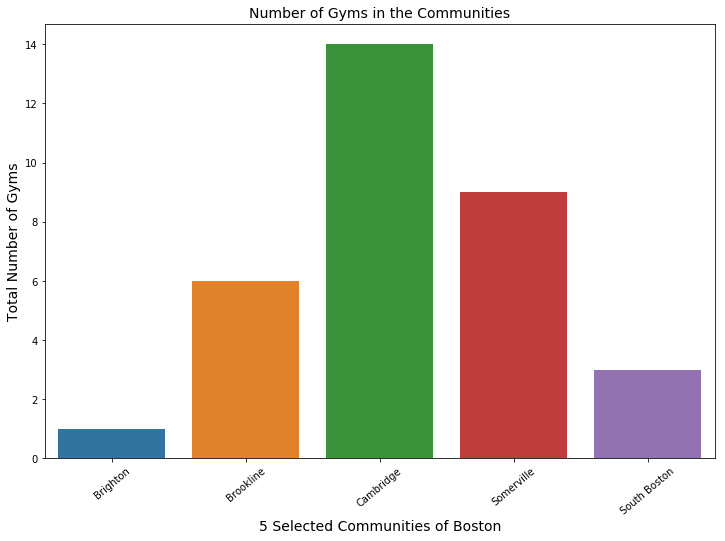

In [109]:
#try groupby to play with Gym

Boston_5_Comm_Venues_only_Gym = Boston_5_Comm_Venues.groupby(['Community'])['Venue_Category'].apply(lambda x: x[x.str.contains('Gym')].count())
Boston_5_Comm_Venues_only_Gym_df = Boston_5_Comm_Venues_only_Gym.to_frame().reset_index()
Boston_5_Comm_Venues_only_Gym_df.columns = ['Community', 'Number of Gym']
Boston_5_Comm_Venues_only_Gym_df.index = np.arange(1, len(Boston_5_Comm_Venues_only_Gym_df)+1)


list_rest_no = Boston_5_Comm_Venues_only_Gym_df['Number of Gym'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Community', y='Number of Gym', data=Boston_5_Comm_Venues_only_Gym_df)

bar.set_ylabel("Total Number of Gyms", fontsize=14)
bar.set_xlabel("5 Selected Communities of Boston", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Gyms in the Communities", fontsize=14)

plt.show()